Посчитать tpr и fpr в ноутбуке к лекции. Убедиться, что график ROC AUC получается таким же, как и штатными средствами.

Построить график Precision - Recall на этих же данных.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

In [2]:
data = pd.read_csv('affair_data.csv')
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rate_marriage    6366 non-null   float64
 1   age              6366 non-null   float64
 2   yrs_married      6366 non-null   float64
 3   children         6366 non-null   float64
 4   religious        6366 non-null   float64
 5   educ             6366 non-null   float64
 6   occupation       6366 non-null   float64
 7   occupation_husb  6366 non-null   float64
 8   affair           6366 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 447.7 KB


In [4]:
from sklearn.linear_model import LogisticRegression

# импортируем метод для автоматической разбивки на обучающую и тестовую выборки
# раньше использовали from sklearn.cross_validation import train_test_split  
from sklearn.model_selection import train_test_split

In [6]:
#Формируем набор признаков и целевую переменную

X = data[data.columns[:-1]]
X.head(2)

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0


In [7]:
Y = data['affair']

In [8]:
model = LogisticRegression()

In [9]:
#Разбиваем данные на обучающую и тестовую выборки в соотношении 70 / 30

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [10]:
#Обучаем модель

model.fit(X_train, Y_train)

LogisticRegression()

In [11]:
#Получаем прогнозные значения модели (переменная predictions)

predictions = model.predict_proba(X_test)
model.score(X_test, Y_test)

0.7319371727748691

In [12]:
#Построим набор моделей для значений random_state от 0 до 9. Получите model.score для каждого варианта.

for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = i)
    model = LogisticRegression()
    model.fit(X_train, Y_train)
    print("{}: {}".format(i, model.score(X_test, Y_test)))

0: 0.7319371727748691
1: 0.731413612565445
2: 0.7172774869109948
3: 0.7198952879581152
4: 0.7136125654450262
5: 0.7272251308900524
6: 0.7136125654450262
7: 0.7361256544502618
8: 0.7162303664921466
9: 0.7204188481675393


## Оценка качества модели ##

In [13]:
#Считаем accuracy последней модели

tp = 0 # True positive
fp = 0 # False positive
fn = 0 # False negative
tn = 0 # True negative

predictions = model.predict_proba( X_test )
for predicted_prob, actual in zip( predictions[:, 1], Y_test ):    
    if predicted_prob >= 0.5:
        predicted = 1
    else:
        predicted = 0
    
    if predicted == 1:
        if actual == 1:
            tp += 1
        else:
            fp += 1
    
    else:
        if actual == 1:
            fn += 1
        else:
            tn += 1

In [14]:
# какая точность получилась?
(tp + tn) / (tp + fp + fn + tn)

0.7204188481675393

In [15]:
precision = tp / (tp + fp)
precision

0.5681233933161953

## Используем готовые библиотеки ##

### метод для построения графика precision-recall ###

In [16]:
from sklearn.metrics import precision_recall_curve
pr, re, thres = precision_recall_curve( Y_test, predictions[:, 1] )

# посмотрим что получилось
for line in zip( pr, re, thres ):
    print( line )

(0.307813319349764, 1.0, 0.04895298401206899)
(0.3074501573976915, 0.9982964224872232, 0.05209819302498272)
(0.30761154855643047, 0.9982964224872232, 0.05253954665590021)
(0.3077731092436975, 0.9982964224872232, 0.0529095160747486)
(0.30793483972674723, 0.9982964224872232, 0.05372856580615496)
(0.30809674027339645, 0.9982964224872232, 0.05418294176218937)
(0.30825881115202525, 0.9982964224872232, 0.05456381708303822)
(0.30842105263157893, 0.9982964224872232, 0.05474130916205825)
(0.30858346498156924, 0.9982964224872232, 0.05545339642176163)
(0.3087460484720759, 0.9982964224872232, 0.05780133946598193)
(0.30890880337374804, 0.9982964224872232, 0.05932823644106059)
(0.3090717299578059, 0.9982964224872232, 0.05936553668068811)
(0.3092348284960422, 0.9982964224872232, 0.06182230554590071)
(0.3093980992608237, 0.9982964224872232, 0.06210530795572179)
(0.30956154252509244, 0.9982964224872232, 0.06244016880716778)
(0.3091966173361522, 0.9965928449744463, 0.06245992407776011)
(0.30936012691697

(0.46485260770975056, 0.6984667802385008, 0.29970765611338784)
(0.4642451759364359, 0.696763202725724, 0.30140536219498276)
(0.46583143507972663, 0.696763202725724, 0.3014655913722636)
(0.4663625997719498, 0.696763202725724, 0.30189230306358644)
(0.4668949771689498, 0.696763202725724, 0.30204317404179054)
(0.465675057208238, 0.6933560477001703, 0.3020566823228181)
(0.4650630011454754, 0.6916524701873935, 0.3024324687846085)
(0.46559633027522934, 0.6916524701873935, 0.302649661464114)
(0.46498277841561425, 0.6899488926746167, 0.30265638256325356)
(0.46543778801843316, 0.6882453151618398, 0.3030255183163378)
(0.46482122260668973, 0.686541737649063, 0.3039800715691835)
(0.46420323325635104, 0.6848381601362862, 0.3042252828348102)
(0.4647398843930636, 0.6848381601362862, 0.30445224031795204)
(0.46412037037037035, 0.6831345826235093, 0.3044670634257368)
(0.46349942062572425, 0.6814310051107325, 0.3049885864996678)
(0.46403712296983757, 0.6814310051107325, 0.3054151798947289)
(0.464576074332

(0.5684523809523809, 0.32538330494037476, 0.5325061913640341)
(0.5671641791044776, 0.32367972742759793, 0.5326070073893738)
(0.5688622754491018, 0.32367972742759793, 0.5327780323759127)
(0.5705705705705706, 0.32367972742759793, 0.5331226890251429)
(0.572289156626506, 0.32367972742759793, 0.5337108285650248)
(0.5740181268882175, 0.32367972742759793, 0.5338934613153693)
(0.5727272727272728, 0.3219761499148211, 0.5339013860675899)
(0.5714285714285714, 0.3202725724020443, 0.5343354595062508)
(0.5701219512195121, 0.3185689948892675, 0.5346205883138668)
(0.5718654434250765, 0.3185689948892675, 0.5348831907163145)
(0.5736196319018405, 0.3185689948892675, 0.5364631328501098)
(0.5753846153846154, 0.3185689948892675, 0.5370729634105427)
(0.5771604938271605, 0.3185689948892675, 0.5378128299949932)
(0.5758513931888545, 0.31686541737649065, 0.5390771076156411)
(0.5745341614906833, 0.3151618398637138, 0.539105267540883)
(0.5763239875389408, 0.3151618398637138, 0.5394583055318912)
(0.5799373040752351

In [17]:
from sklearn.metrics import average_precision_score

In [18]:
# площадь под кривой
average_precision_score( Y_test, predictions[:, 1] )

0.5370782474582139

Text(0, 0.5, 'Recall')

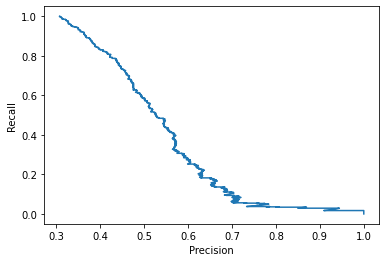

In [25]:
plt.plot(pr, re)
plt.xlabel('Precision')
plt.ylabel('Recall')

## ROC ##

In [20]:
# посчитаем ROC-кривую (Receiver Operating Characteristic)
from sklearn.metrics import roc_curve

In [21]:
# получаем значения false и true positive rate для различных значений порога
fpr, tpr, thres = roc_curve( Y_test, predictions[:, 1] )

In [22]:
for line in zip( fpr, tpr, thres ):
    print( line )

(0.0, 0.0, 1.9445589116929485)
(0.0, 0.0017035775127768314, 0.9445589116929486)
(0.0, 0.017035775127768313, 0.878993927206372)
(0.0007558578987150416, 0.017035775127768313, 0.8786478758172626)
(0.0007558578987150416, 0.028960817717206135, 0.8743556645404517)
(0.0022675736961451248, 0.028960817717206135, 0.8701673110252581)
(0.0022675736961451248, 0.034071550255536626, 0.866820121676076)
(0.003779289493575208, 0.034071550255536626, 0.8579621189220964)
(0.003779289493575208, 0.03577512776831346, 0.8557638759465062)
(0.0045351473922902496, 0.03577512776831346, 0.8523294498006719)
(0.0045351473922902496, 0.03747870528109029, 0.8505415363631663)
(0.006046863189720333, 0.03747870528109029, 0.8373703327185341)
(0.006046863189720333, 0.049403747870528106, 0.8283556793284118)
(0.006802721088435374, 0.049403747870528106, 0.8272570984293084)
(0.006802721088435374, 0.05281090289608177, 0.8244237892338429)
(0.007558578987150416, 0.05281090289608177, 0.8228902795484694)
(0.007558578987150416, 0.0545

Text(0, 0.5, 'True Positive Rate')

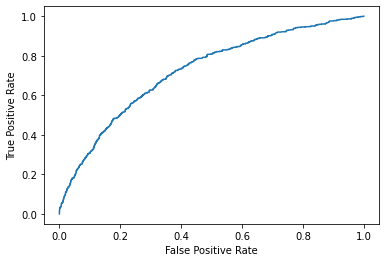

In [31]:
plt.plot( fpr, tpr )

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

## FPR и TPR, Precision и Recall вручную ##

In [27]:
tpr_manual = []
fpr_manual = []
precision_manual = []
recall_manual = []

Thres = np.linspace(1.0, 0.0, num=100, endpoint=True)
for threshold in Thres:
    tp_m = 0 # True positive_manual
    fp_m = 0 # False positive_manual
    fn_m = 0 # False negative_manual
    tn_m = 0 # True negative_manual
    for predicted_prob, actual in zip(predictions[:, 1], Y_test ):    
        if predicted_prob >= threshold:
            predicted = 1
        else:
            predicted = 0
        if predicted == 1:
            if actual == 1:
                tp_m += 1
            else:
                fp_m += 1
        else:
            if actual == 1:
                fn_m += 1
            else:
                tn_m += 1
    # метрики
    tpr_manual.append( tp_m / (tp_m + fn_m) )
    fpr_manual.append( fp_m / (fp_m + tn_m) )
    recall_manual.append( tp_m / (tp_m + fn_m) )
    if (tp_m + fp_m) != 0:
        precision_manual.append( tp_m / (tp_m + fp_m) )
    else:
        precision_manual.append(None)

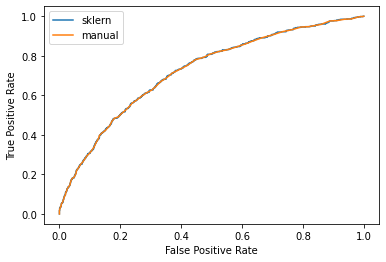

In [28]:
plt.plot(fpr, tpr, label = 'sklern')
plt.plot(fpr_manual, tpr_manual, label = 'manual')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()
plt.show()

In [29]:
square_roc = 0
for i in range(len(fpr_manual) - 1):
    square_roc += 0.5 * (tpr_manual[i+1] + tpr_manual[i]) * (fpr_manual[i+1] - fpr_manual[i])
print('Площадь под кривой Manual: ', square_roc)
print('Площадь под кривой Roc_auc_score: ', roc_auc_score( Y_test, predictions[:, 1] ))

Площадь под кривой Manual:  0.7220870176577162
Площадь под кривой Roc_auc_score:  0.7225943566902437


#### график ROC AUC получается очень близким к постороенному штатными средствами ####

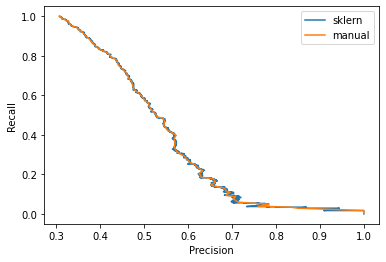

In [30]:
plt.plot(pr, re, label = 'sklern')
plt.plot(precision_manual, recall_manual, label = 'manual')

plt.xlabel('Precision')
plt.ylabel('Recall')

plt.legend()
plt.show()

#### График Precision - Recall так же очень близок к постороенному штатными средствами ####